In [52]:

# Importing the necessary dependencies
import pyodbc #---> coonectivity interface that allows python and server to communicate 
from sqlalchemy import create_engine # ---> gets the engine function form the library
import pandas as pd # ---> converts the data to a dataframe import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [53]:
# suppressing specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [54]:
# checking for the pyodbc driver to be used in connectivity
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [55]:
# Creating a connection string that links the python notebook and the sql server
# Uisng windows Authentication(Tusted Connection)

server = 'DESKTOP-OGVCRV3'   #---> Computer's SQL server name
database = 'HeartDisease'     # ----> Dtabase I'm connecting to

engine = create_engine(
    f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)


In [56]:
# loading the data into a  pandas data frame

H_disease = pd.read_sql("SELECT*FROM Heart_Disease", engine)
print("Dataset is successfully loaded!!")

Dataset is successfully loaded!!


In [57]:
# loading the dataset into dataframe--> repeat

H_disease = pd.read_sql("SELECT*FROM Heart_Disease", engine)

print("Summary of the Heart Disease dataset: \n")

# Checking the first 5 rows of the dataset
print(H_disease.head())
print("**"*100)

# Checking the shape of the dataset
print(H_disease.shape)
print("**"*100)

# Checking the information of the dataset
print(H_disease.info())
print("**"*100)

# Listing the columns of the dataset
print(H_disease.columns)
print("**"*100)




Summary of the Heart Disease dataset: 

   age    sex  cp  trestbps  chol    fbs  restecg  thalach  exang  oldpeak  \
0   63   True   3       145   233   True        0      150  False      2.3   
1   37   True   2       130   250  False        1      187  False      3.5   
2   41  False   1       130   204  False        0      172  False      1.4   
3   56   True   1       120   236  False        1      178  False      0.8   
4   57  False   0       120   354  False        1      163   True      0.6   

   slope  ca  thal  target  
0      0   0     1    True  
1      0   0     2    True  
2      2   0     2    True  
3      2   0     2    True  
4      2   0     2    True  
********************************************************************************************************************************************************************************************************
(303, 14)
**********************************************************************************************************

In [58]:
# Converting the boolean data type into categorical
H_disease['sex'] = H_disease['sex'].map({True:'Male', False: 'Female'})
H_disease['fbs'] = H_disease['fbs'].map({True: 1, False:0})
H_disease['exang'] = H_disease['exang'].map({True:1, False:0})
H_disease['target'] = H_disease['target'].map({True:1, False:0})


In [59]:
# Checking the info and statistical summary of the dataset

print("Info of the Heart dataset: \n")
print(H_disease.info())
print("**"*100)

print('Statistcal summary of the Heart_Disease dataset:\n')
print(H_disease.describe())

Info of the Heart dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB
None
*****************************************************************************************************************************************************************************

In [60]:
# Identifying the unique values  for categorcial column:

for col in H_disease.select_dtypes(include='object').columns:
    print(f"{col}: {H_disease[col].unique()}")
    print("*"*60)

# Counting the numebrs of the unique values
print(H_disease['sex'].value_counts())
print("*"*60)
  

sex: ['Male' 'Female']
************************************************************
sex
Male      207
Female     96
Name: count, dtype: int64
************************************************************


In [61]:
# Identifying the unique values for the classified columns

unique_cols= ['cp','fbs','restecg','exang','slope','thal','target','ca']

for col in unique_cols:
    print(f"Unique values in {col}: {H_disease[col].unique()}")
    print(f"Count of unique values in {col}: {H_disease[col].value_counts()}")
    print("*"*60, '\n')

Unique values in cp: [3 2 1 0]
Count of unique values in cp: cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
************************************************************ 

Unique values in fbs: [1 0]
Count of unique values in fbs: fbs
0    258
1     45
Name: count, dtype: int64
************************************************************ 

Unique values in restecg: [0 1 2]
Count of unique values in restecg: restecg
1    152
0    147
2      4
Name: count, dtype: int64
************************************************************ 

Unique values in exang: [0 1]
Count of unique values in exang: exang
0    204
1     99
Name: count, dtype: int64
************************************************************ 

Unique values in slope: [0 2 1]
Count of unique values in slope: slope
2    142
1    140
0     21
Name: count, dtype: int64
************************************************************ 

Unique values in thal: [1 2 3 0]
Count of unique values in thal: thal
2    166
3    1

In [62]:
# checking for missing values in the dataset
H_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
# importing numpy dependancy
import numpy as np

# replacing the Zero values in thal and ca with NaN as they are errors.
H_disease['thal'] = H_disease['thal'].replace(0,np.nan)
H_disease['ca'] = H_disease['ca']. replace(4,np.nan)

In [64]:
# rechecking for missing values
H_disease.isnull().sum()

print(f"The missing values in:\n {H_disease.isnull().sum()}\n")

print("*The missing values will be imputed before doing ML.")

The missing values in:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

*The missing values will be imputed before doing ML.


In [65]:
# mapping the sex column  

H_disease['sex']= H_disease['sex'].map({'Male':1, 'Female': 0})

# checking the first 5 rows
H_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [66]:

# imputing the missing values in ca and thal with a median
median_value = H_disease['thal'].median()   #---> computes the median value
H_disease['thal']= H_disease['thal'].fillna(median_value)

median_val = H_disease['ca'].median()    # --> computes the median value for ca
H_disease['ca']= H_disease['ca'].fillna(median_val)   #--> replace the missing value with the median

# rechecking the dataset for mssing values
print(H_disease.isnull().sum())

print('\nThe missing values have been succefully imputed')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The missing values have been succefully imputed


In [67]:
# importing the necessary dependency
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
# separating the feature from the target
X= H_disease.drop(columns='target', axis = 1)
Y= H_disease['target']

In [69]:
# splitting the data into taining and testing 
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

# checking the shape of the train and test 
print(X.shape,X_train.shape,X_test.shape)
print("*"*40)
print(Y.shape,y_train.shape,y_test.shape)

(303, 13) (242, 13) (61, 13)
****************************************
(303,) (242,) (61,)


In [70]:
# Initialising the standardscaler
Scaler = StandardScaler()

# scaling the values of the trainig data
X_train_standardized = Scaler.fit_transform(X_train)

# scaling the test data
X_test_standardized = Scaler.transform(X_test)


In [71]:
# printing out the standardized data  ---> Standardization ensures the values are within the same ranges
print(X_train_standardized)
print("**"*80)
print(X_test_standardized)

[[-1.35679832  0.72250438  0.00809909 ...  0.95390513 -0.68814973
  -0.53984783]
 [ 0.38508599  0.72250438 -0.97189094 ...  0.95390513 -0.68814973
   1.20206116]
 [-0.92132724  0.72250438  0.98808912 ... -0.69498803 -0.68814973
  -0.53984783]
 ...
 [ 1.58263146  0.72250438  1.96807914 ... -0.69498803  0.40029625
  -0.53984783]
 [-0.92132724  0.72250438 -0.97189094 ...  0.95390513 -0.68814973
   1.20206116]
 [ 0.92942484 -1.38407465  0.00809909 ...  0.95390513  1.48874224
  -0.53984783]]
****************************************************************************************************************************************************************
[[ 2.76218225e-01  7.22504380e-01 -9.71890936e-01  1.16949120e+00
   5.53408401e-01 -3.83300706e-01 -1.04610909e+00 -1.70875171e+00
   1.47790748e+00 -3.75556276e-01 -6.94988026e-01  4.00296251e-01
  -2.28175682e+00]
 [ 4.93953764e-01  7.22504380e-01  1.96807914e+00  2.36038903e+00
   7.81171723e-01 -3.83300706e-01 -1.04610909e+00  3.98288831e-0

In [72]:
# Initializing the model

model = LogisticRegression(random_state=42)

# Fitting the model with the model withnthe feature(X_traine_standardized) and label(y_train)
model.fit(X_train_standardized,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
# creating the y_predictions

y_pred = model.predict(X_test_standardized)

In [74]:
# checking the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print(f'The accuracy score is: {accuracy:.4f}''\n')

#Use of confusion matrix to check the performamnce of the model
conf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print(f'The confusion matrix is:\n{conf_matrix}\n')

# use of classification score to check the performamnce of the model
class_report=classification_report(y_test,y_pred)
print(f"Classification report is: \n{class_report}")


The accuracy score is: 0.8852

The confusion matrix is:
[[28  4]
 [ 3 26]]

Classification report is: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



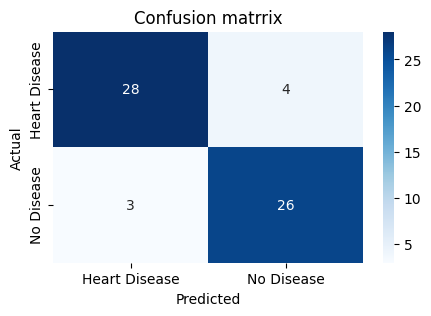

In [75]:
# Using the confusion matrix
#y_test--> the actual labels(0,1), y_pred ---> predicted labels from the logistic regression

# generating a confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])  #--> ensures 1->Heart disease 0-> no disease

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(conf_matrix,annot =True,fmt ='d',cmap = 'Blues',
            xticklabels=['Heart Disease', 'No Disease'],
            yticklabels=['Heart Disease', 'No Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrrix')
plt.show()


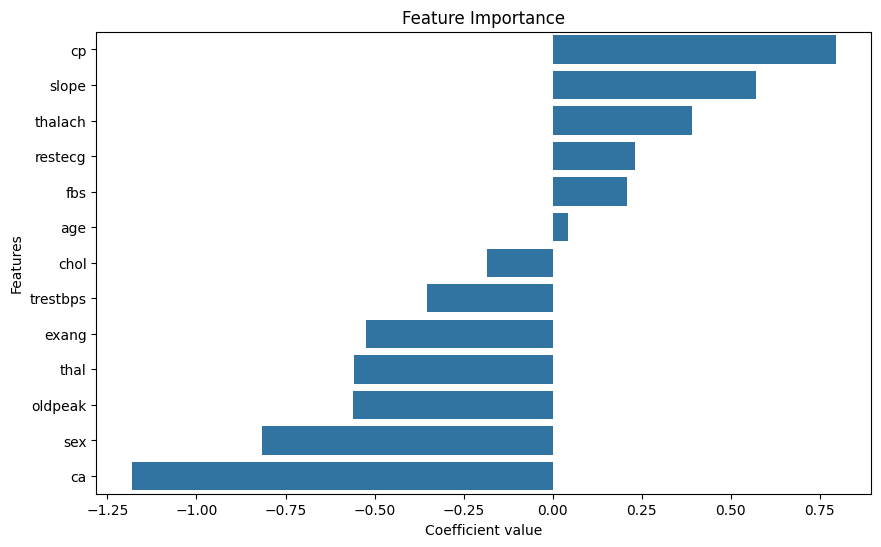

In [76]:
# Feature Importance/Interpretation of the model
# Identifying which feature derive predictions based on the coeefficients


# feature importance of the model
feature_importance = pd.Series(model.coef_[0], index= X_train.columns)
feature_importance = feature_importance.sort_values(ascending= False)


plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y = feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Coefficient value")
plt.ylabel("Features")
plt.show()

In [77]:
# creating a list to hold the data
input_data = [57,0,0,120,350,0,1,163,1,0.6,2,0.0,2.0]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardizing the input data
Standard_input_data = Scaler.transform(input_data_reshaped)
print(Standard_input_data)

# fitting the standardized input data into the model
predictions = model.predict(Standard_input_data)

# calling the predict value
print("This is the target:", predictions)

if (predictions[0] == 0):
    print("The person has No Disease")
else:
    print("The person has Heart Disease")


[[ 0.27621823 -1.38407465 -0.97189094 -0.61685555  1.95794888 -0.38330071
   0.8431327   0.57761143  1.47790748 -0.3755563   0.95390513 -0.68814973
  -0.53984783]]
This is the target: [1]
The person has Heart Disease


c:\Users\hp\Desktop\DS_25\Heart_Disease_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
# importing the necessary library
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve

In [79]:
# predicting proabilities of logistic regression
y_probs_1= model.predict_proba(X_test_standardized)[:,1] #-->gets the probabilities of the positive class

#computing ROC-AUC
auc_score_1= roc_auc_score(y_test,y_probs_1)   #--> gets the Area under the ROC curve, to measure model performace
print(f"ROC-AUC for Logistic regression: {auc_score_1:.4f}")

ROC-AUC for Logistic regression: 0.9407


Saving Model to file--> using pickle

In [ ]:
# importing the pickle library
import pickle as pkl

#save the trained model to a file
with open ('heart_disease.pkl', 'wb') as file:
    pkl.dump(model,file)     # --> saves the model to a file while preserving its state

print("Model has been trained and saved as 'heart_disease.pkl'")

Model has been trained and saved as 'heart_disease.pkl'


In [ ]:
# saving scaler as file
with open('Scaler.pkl', 'wb') as file:
    pkl.dump(Scaler,file)
